In [14]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [15]:
# Read data using pandas
df=pd.read_csv("C:/Users/kumar/OneDrive/Desktop/Data Science/Project Files/happiness_score.csv")

In [16]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [17]:
df.rename(columns={'Happiness.Rank': 'Happiness Rank',
                       'Happiness.Score': 'Happiness Score',
                       'Economy': 'Economy (GDP per Capita)',
                       'Health': 'Health (Life Expectancy)',
                       'Trust': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'}, inplace=True)

In [18]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [19]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [20]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [21]:
# Checking for skewness
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

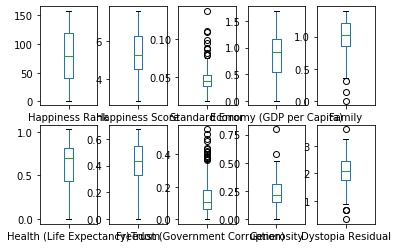

In [22]:
# Data Visualization
# Unvariate plot
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False)
plt.show()

Below column have skewness :-
Standard Error,Family,Trust (Government Corruption),Generosity,Dystopia Residual

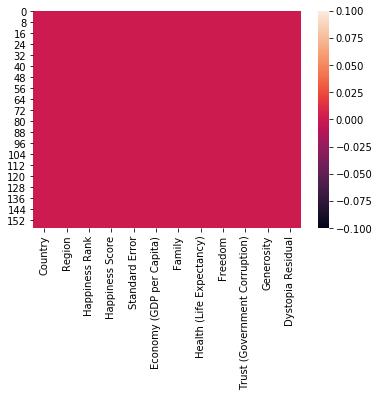

In [23]:
# Checking missing values using heatmap
sns.heatmap(df.isnull())

In [24]:
# checking correlation
dfcor=df.corr()
dfcor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


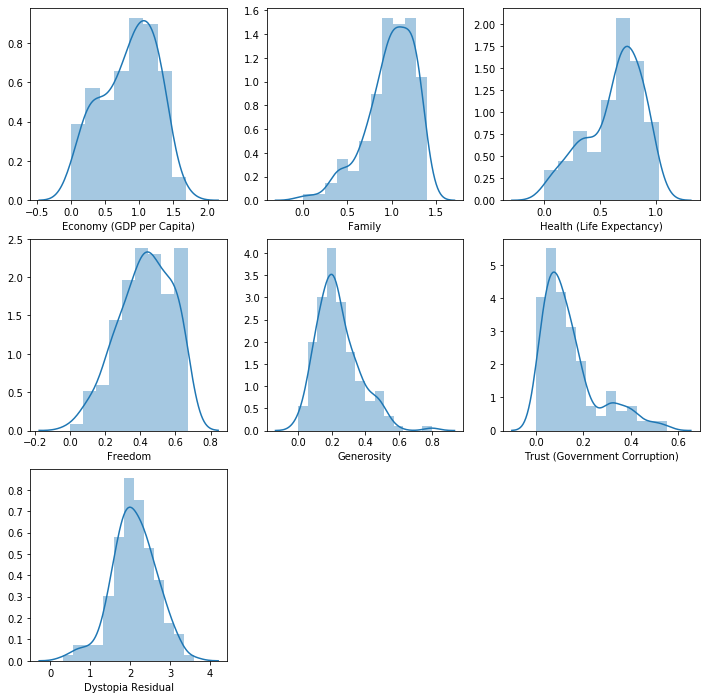

In [25]:
# Visualize happiness factor contributors using distribution plot

happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Generosity', 'Trust (Government Corruption)', 
           'Dystopia Residual']

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sns.distplot(data[column])

plt.figure(figsize=(12,12))
plot_columns_on_grid(df, happiness_factors, (3, 3))

Conclusion-
Above distributions displays that there are at least two distinct groups of countries. 
Like Health data has the majority clustered around 0.7 but also a second group of countries around 0.3/0.4.

In [26]:
dat = df[happiness_factors].sum(axis=1)
residual = df['Happiness Score'] - dat
residual.describe()

count    158.000000
mean      -0.000017
std        0.000281
min       -0.000510
25%       -0.000247
50%       -0.000050
75%        0.000217
max        0.000490
dtype: float64

The residual value by the above explanation is quite small,lets consider it as passed.

# Finding Happiness by region :-

In [27]:
by_region = df.groupby('Region')

In [28]:
by_region[['Happiness Score'] + happiness_factors].mean().sort_values(by='Happiness Score', ascending=False)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
Region,,,,,,,,
Australia and New Zealand,7.285000,1.291880,1.314450,0.919965,0.645310,0.455315,0.392795,2.265355
North America,7.273000,1.360400,1.284860,0.883710,0.589505,0.429580,0.244235,2.480935
Western Europe,6.689619,1.298596,1.247302,0.909148,0.549926,0.302109,0.231463,2.151185
Latin America and Caribbean,6.144682,0.876815,1.104720,0.703870,0.501740,0.217788,0.117172,2.622577
Eastern Asia,5.626167,1.151780,1.099427,0.877388,0.462490,0.225885,0.127695,1.681607
Middle East and Northern Africa,5.406900,1.066973,0.920490,0.705616,0.361751,0.190375,0.181702,1.980009
Central and Eastern Europe,5.332931,0.942438,1.053042,0.718774,0.358269,0.152264,0.086674,2.021400
Southeastern Asia,5.317444,0.789054,0.940468,0.677357,0.557104,0.419261,0.151276,1.783020
Southern Asia,4.580857,0.560486,0.645321,0.540830,0.373337,0.341429,0.102536,2.016769


Australia and New Zealand is the region with the most happy people, closely followed by North America. 
North America seems to be followerd by Australia and New Zealand 
The least happy people are living in Sub-Saharan Africa.

# Happiness depends on factors:-

Check the influence of the 6 factors Economy, Family, etc. on happiness depending on regions.
Nomalize the factors to the total happiness score.
Check with heatmap

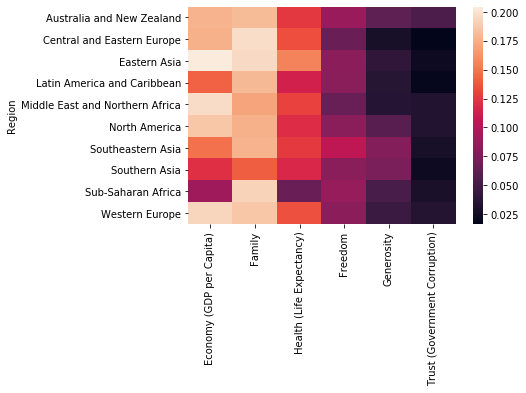

In [29]:
sns.heatmap(by_region[happiness_factors[:-1]].mean().div(by_region['Happiness Score'].mean(), axis='index'))

Most important Contributor to happiness score-economy,family 
Medium important Contributor to happiness score-Health
Least important contributors-Generosity,freedom,Trust 

# Cluster Analysis-Do Country wise happiness factor analysis

In [30]:
df_norm = df
df_norm[happiness_factors] = df_norm[happiness_factors].div(df['Happiness Score'].values, axis=0)

In [31]:
from sklearn.cluster import KMeans

cluster_n = 3
k_means = KMeans(init='k-means++', n_clusters=cluster_n, n_init=10)
cluster_labels = k_means.fit_predict(df_norm[happiness_factors[:-1]])

Plot distributions of the factors for each cluster:

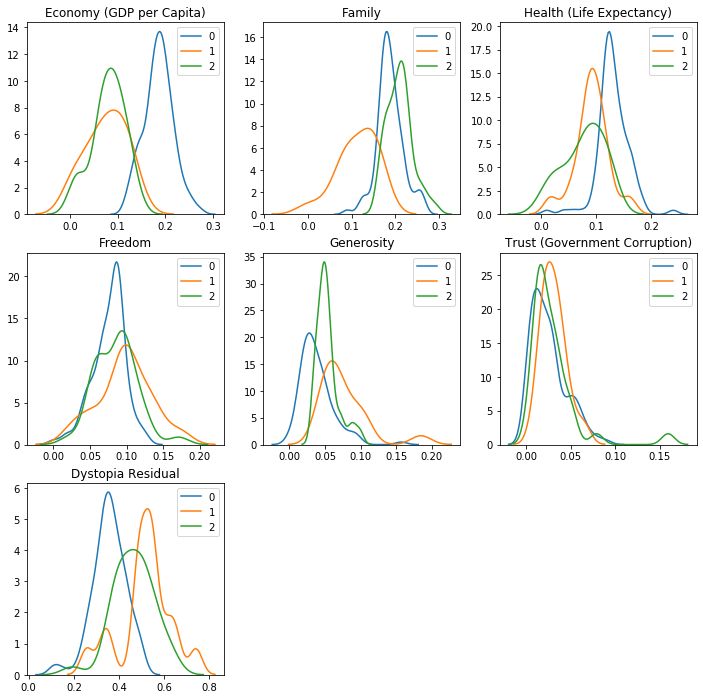

In [32]:
plt.figure(figsize=(12,12))
for i, factor in enumerate(happiness_factors):
    ax = plt.subplot(3, 3, i+1)
    for cluster in range(cluster_n):
        sns.kdeplot(df_norm.loc[cluster_labels == cluster, factor], label=cluster)
        ax.set_title(factor)

From the above distribution plot we can conclude that there are 3 clusters impacting happiness score i.e high=2,medium=1,low=0

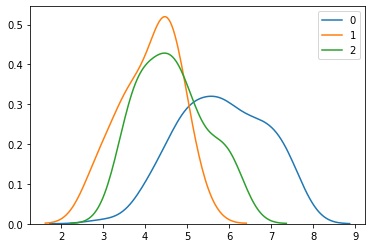

In [33]:
# Compare happiness score distribution for the clusters:-

for cluster in range(cluster_n):
    sns.kdeplot(df.loc[cluster_labels == cluster, 'Happiness Score'], label=cluster)

Above plot displays that area accupied by high happiness score is less as compared to medium & area occupied by low happiness score is more.

There is a big difference between the happiness score distributions of each clusters

# Finding Happiness by Happiness Rank :-

This map visualizes coutries clustered by the factors contributing to happiness.

Bright red colored countries are not part of the analysis

In [34]:
by_HappinessRank = df.groupby('Happiness Rank')

In [35]:
by_HappinessRank[['Happiness Score'] + happiness_factors].mean().sort_values(by='Happiness Score', ascending=False)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
Happiness Rank,,,,,,,,
1,7.587,0.184066,0.177871,0.124085,0.087725,0.039117,0.055329,0.331802
2,7.561,0.172242,0.185456,0.125359,0.083160,0.057704,0.018708,0.357361
3,7.527,0.176097,0.180760,0.116200,0.086273,0.045355,0.064245,0.331080
4,7.522,0.193964,0.176941,0.117683,0.089036,0.046130,0.048528,0.327747
5,7.427,0.178577,0.178081,0.121938,0.085226,0.061682,0.044375,0.330114
...,...,...,...,...,...,...,...,...
154,3.465,0.064092,0.223290,0.123706,0.170854,0.065304,0.159281,0.193483
155,3.340,0.085823,0.105946,0.095539,0.145060,0.054671,0.023982,0.489006
156,3.006,0.220625,0.157981,0.240163,0.052176,0.156949,0.062894,0.109308


Final Conclusion-
Countries Switzerland,Iceland,Denmark,Norway belongs to Western Europe have highest happiness score but there are 21 countries belongs to this region means only approx 30% countries have highest happiness score & other have least.
Region wise Austrialia & New Zealand have highest happiness score which followed by North America & after that 70% countries from Western Europe follwed.
People belongs to Region 'Sub-Saharan Africa' have least happiness score.